[*********************100%***********************]  10 of 10 completed



Risk-Return Table (First 5 Years):
         Risk (%)  Return (%)  Risk Adj. Return  Weightage
Ticker                                                   
AAPL       30.01       39.31              1.31       0.16
CVX        31.97        3.83              0.12       0.01
F          33.25       -1.53             -0.05      -0.01
GOOGL      26.29       22.27              0.85       0.10
META       32.76       28.51              0.87       0.10
MS         34.51       18.25              0.53       0.06
MSFT       27.64       40.18              1.45       0.17
NVDA       47.49      105.60              2.22       0.27
TSLA       56.88       82.75              1.45       0.17
XOM        27.32      -10.17             -0.37      -0.04


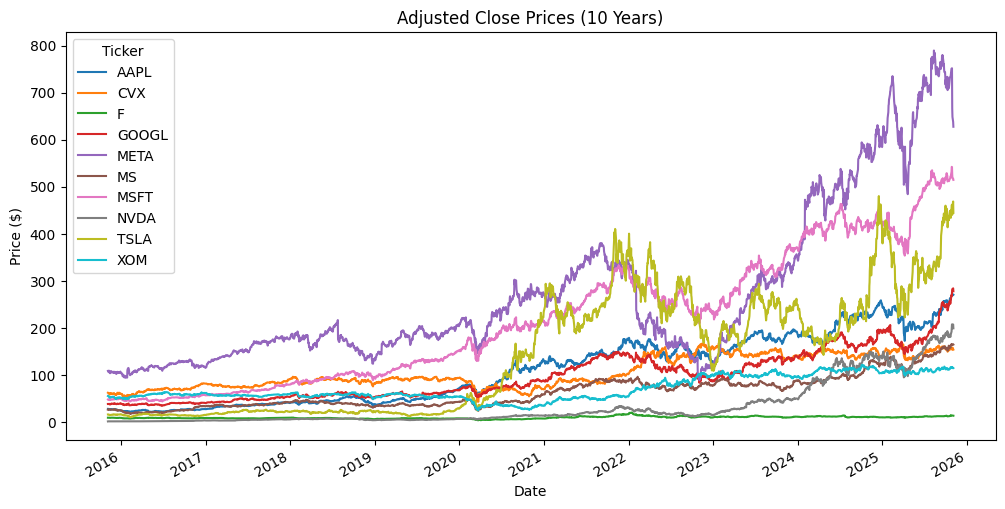

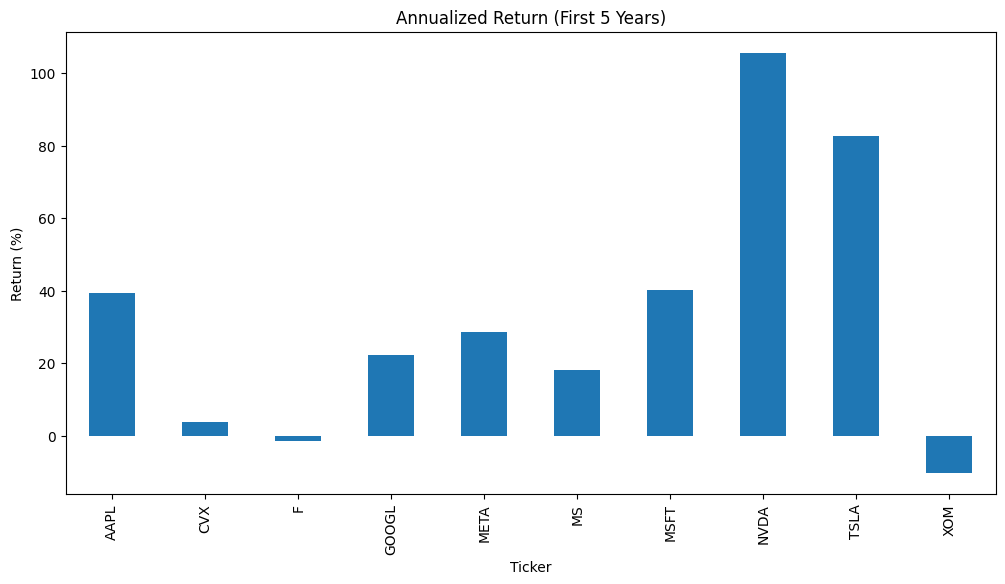

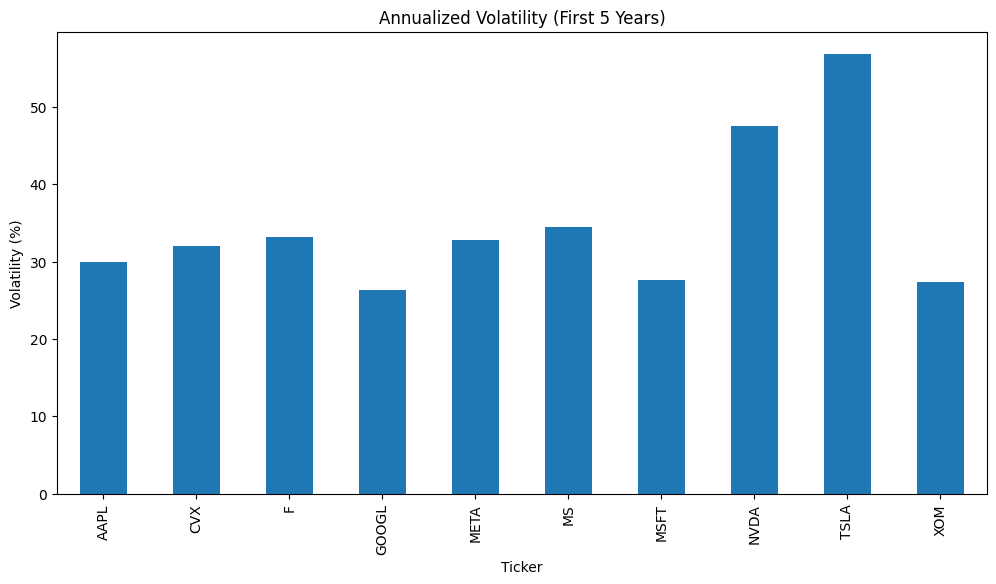

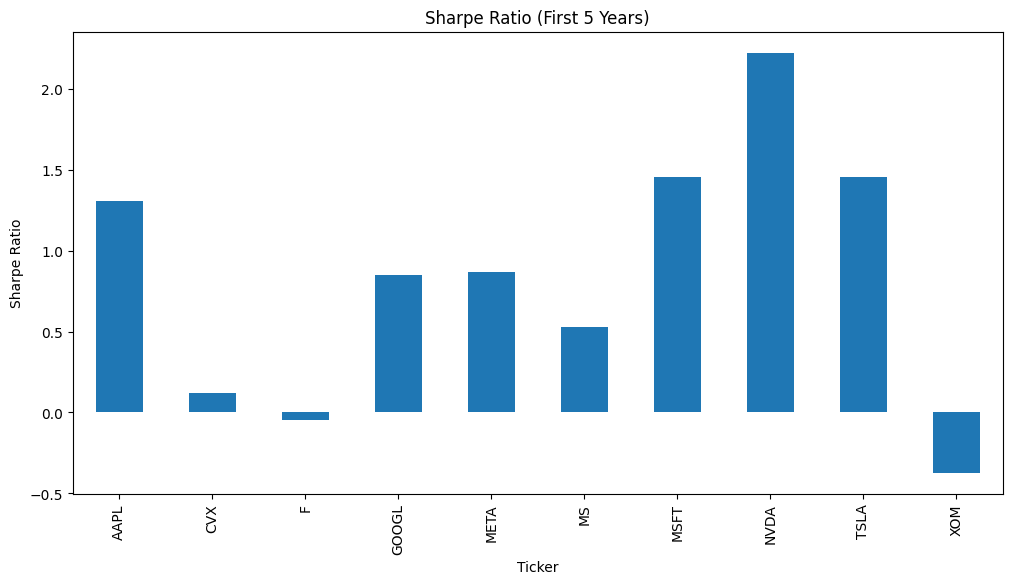

In [94]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETERS ---
tickers = ['AAPL', 'MSFT', 'F', 'MS', 'NVDA', 'TSLA', 'META', 'CVX', 'XOM', 'GOOGL']
data = yf.download(tickers, period='10y', interval='1d', auto_adjust=False)
adj_close_df = data['Adj Close'].copy()  # Make a copy for safety

# --- CALCULATE DAILY RETURNS ---
daily_returns = adj_close_df.pct_change().dropna()

# --- SUBSET FIRST 5 YEARS (approx. 252 trading days per year) ---
daily_returns_5y = daily_returns.iloc[:252*5]

# --- METRIC CALCULATIONS ---
avg_daily_ret = daily_returns_5y.mean()
ann_return = ((1 + avg_daily_ret) ** 250 - 1) * 100  # Annualized % Return
ann_vol = daily_returns_5y.std() * np.sqrt(250) * 100   # Annualized Volatility %
sharpe_ratio = ann_return / ann_vol                  # Risk-adjusted Return

# --- CREATE SUMMARY DATAFRAME ---
risk_return_df = pd.DataFrame({
    'Risk (%)': ann_vol,
    'Return (%)': ann_return,
    'Risk Adj. Return': sharpe_ratio
}, index=avg_daily_ret.index)
# Compute weightage based on risk-adjusted return
risk_adj_sum = risk_return_df['Risk Adj. Return'].sum()
risk_return_df['Weightage'] = risk_return_df['Risk Adj. Return'] / risk_adj_sum

print("\nRisk-Return Table (First 5 Years):\n", risk_return_df.round(2))

# --- PLOTS ---
plt.figure(figsize=(12, 6))
adj_close_df.plot(ax=plt.gca(), title='Adjusted Close Prices (10 Years)')
plt.ylabel('Price ($)')
plt.show()

plt.figure(figsize=(12, 6))
risk_return_df['Return (%)'].plot(kind='bar', title='Annualized Return (First 5 Years)')
plt.ylabel('Return (%)')
plt.show()

plt.figure(figsize=(12, 6))
risk_return_df['Risk (%)'].plot(kind='bar', title='Annualized Volatility (First 5 Years)')
plt.ylabel('Volatility (%)')
plt.show()

plt.figure(figsize=(12, 6))
risk_return_df['Risk Adj. Return'].plot(kind='bar', title='Sharpe Ratio (First 5 Years)')
plt.ylabel('Sharpe Ratio')
plt.show()


C:\Users\dines\AppData\Local\Temp\ipykernel_3772\3994045216.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, period='10y', interval='1d')
[*********************100%***********************]  11 of 11 completed


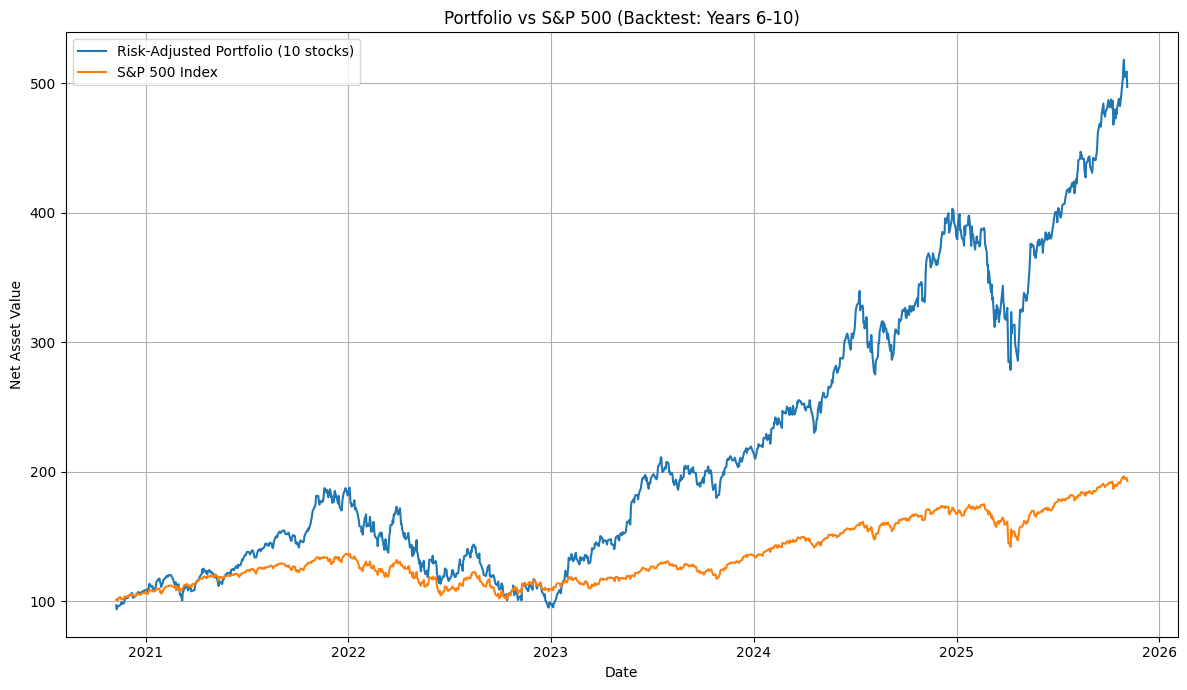

Final Portfolio NAV: 497.24
Final S&P 500 NAV: 192.95
Your portfolio beat the S&P 500 in this period!


In [96]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TICKERS = ['AAPL', 'MSFT', 'F', 'MS', 'NVDA', 'TSLA', 'META', 'CVX', 'XOM', 'GOOGL']
BENCHMARK = '^GSPC'
all_tickers = TICKERS + [BENCHMARK]

data = yf.download(all_tickers, period='10y', interval='1d')
close_df = data['Close']

days_5yr = 252 * 5
first5 = close_df.iloc[:days_5yr]
next5 = close_df.iloc[days_5yr:]

stocks_first5 = first5[TICKERS]
daily_returns_first5 = stocks_first5.pct_change().dropna()
mean_daily = daily_returns_first5.mean()
std_daily = daily_returns_first5.std()

def annualize_return(mean_daily_return):
    return (1 + mean_daily_return) ** 252 - 1

def annualize_volatility(std_daily_return):
    return std_daily_return * np.sqrt(252)

ann_return = mean_daily.apply(annualize_return)
ann_vol = std_daily.apply(annualize_volatility)
sharpe = ann_return / ann_vol
weights = sharpe / sharpe.sum()

stocks_next5 = next5[TICKERS]
daily_returns_next5 = stocks_next5.pct_change().dropna()
portfolio_daily_ret = daily_returns_next5.dot(weights)
portfolio_nav = (1 + portfolio_daily_ret).cumprod() * 100
bench_returns = next5[BENCHMARK].pct_change().dropna()
bench_nav = (1 + bench_returns).cumprod() * 100

plt.figure(figsize=(12,7))
plt.plot(portfolio_nav, label='Risk-Adjusted Portfolio (10 stocks)')
plt.plot(bench_nav, label='S&P 500 Index')
plt.title('Portfolio vs S&P 500 (Backtest: Years 6-10)')
plt.ylabel('Net Asset Value')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Final Portfolio NAV: {portfolio_nav.values[-1]:.2f}")
print(f"Final S&P 500 NAV: {bench_nav.values[-1]:.2f}")
if portfolio_nav.values[-1] > bench_nav.values[-1]:
    print("Your portfolio beat the S&P 500 in this period!")
else:
    print("S&P 500 outperformed your portfolio in this period.")
